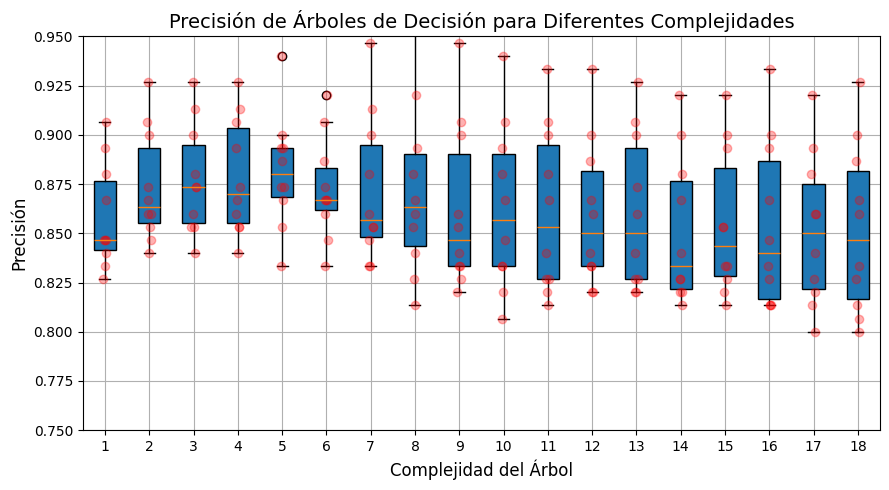

In [1]:
# Limpiar todas las variables del espacio de nombres actual para evitar conflictos.
%reset -f
# Importar los paquetes necesarios.
import numpy as np # Para cálculos numéricos.
import matplotlib.pyplot as plt # Para graficar.
from sklearn import metrics # Para calcular métricas de rendimiento como la precisión.
from sklearn import tree # Para modelos de árbol de decisión.
from sklearn import model_selection # Para utilidades de validación cruzada y selección de modelos.
# Establecer la semilla para la aleatorización (asegura resultados repetibles).
np.random.seed(42)
# Crear un conjunto de datos sintético para la demostración.

N = 500 # Número de muestras
# Generar puntos de distribuciones normales para formar nuestro conjunto de datos.
X = np.vstack([1.25 * np.random.randn(N, 2), 5 + 1.5 *
np.random.randn(N, 2), [8, 5] + 1.5 * np.random.randn(N, 2)])
y = np.concatenate([np.ones((N, 1)), -np.ones((N, 1)), np.ones((N,1))])
# Configurar una validación cruzada de 10 pliegues. Esto dividirá nuestros datos en 10 partes.
kf = model_selection.KFold(n_splits=10, shuffle=True, random_state=0)
# Prepararse para buscar el mejor parámetro de complejidad dentro del rango dado.
C = np.arange(2, 20) # Rango de complejidades del modelo a evaluar.
# Inicializar una matriz para almacenar los puntajes de precisión para diferentes pliegues y complejidades.
acc = np.zeros((10, len(C))) # 10 para pliegues, 18 para el rango de complejidades.
# Realizar validación cruzada.
for i, (train_index, val_index) in enumerate(kf.split(X)):
    # Dividir los datos en conjuntos de entrenamiento y validación para el pliegue actual.
    X_train, X_val = X[train_index], X[val_index]
    y_train, y_val = y[train_index], y[val_index]
    # Evaluar el modelo para cada nivel de complejidad.
    for j, c in enumerate(C):
        # Inicializar y entrenar un clasificador de árbol de decisión en el nivel actual de complejidad.
        dt = tree.DecisionTreeClassifier(min_samples_leaf=1,    max_depth=c)
        dt.fit(X_train, y_train.ravel()) # Entrenar el modelo.
        yhat = dt.predict(X_val) # Predecir los resultados del conjunto de validación.
        # Calcular y almacenar la precisión para el pliegue y lacomplejidad actual.
        acc[i, j] = metrics.accuracy_score(yhat, y_val)
# Graficar la precisión para cada complejidad como un diagrama de caja para mostrar la distribución.
plt.figure(figsize=(9, 5)) # Establecer el tamaño de la figura para una mejor visibilidad.
plt.boxplot(acc, vert=True, patch_artist=True, meanline=True)
# Superponer los puntajes de precisión individuales para cada nivel de complejidad.

for i in range(len(C)):
    xderiv = (i + 1) * np.ones(acc[:, i].shape) + (np.random.rand(10,)- 0.5) * 0.1
    plt.plot(xderiv, acc[:, i], 'ro', alpha=0.3) # 'ro' indica marcadores de círculo rojo.
# Establecer los límites para el eje y para centrarse en el rango de interés.
plt.ylim(0.75, 0.95)
# Etiquetar los ejes y agregar título y leyenda.
plt.xlabel('Complejidad del Árbol', fontsize=12)
plt.ylabel('Precisión', fontsize=12)
plt.title('Precisión de Árboles de Decisión para Diferentes Complejidades', fontsize=14)
# Mostrar el gráfico.
plt.grid(True)
plt.tight_layout() # Ajustar el diseño para evitar solapamientos de etiquetas.
plt.show()